In [21]:
import numpy as np
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import copy
from skimage import exposure
import copy
from scipy import signal
%matplotlib inline

C:\Users\flaco\AppData\Local\Temp\ipykernel_3160\3510340172.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cameraman_origin = imageio.imread('cameraman.tif')
C:\Users\flaco\AppData\Local\Temp\ipykernel_3160\3510340172.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  eco_origin = imageio.imread('eco.tif')


Max val: 2595
Num unique pixels in original cameraman image: 247
Num unique pixels from increasing brightness by 50: 199
Num unique pixels from increasing brightness by 300: 1
Num unique pixels in original eco image: 1748
Num unique pixels from increasing brightness by 50: 5
Num unique pixels from increasing brightness by 300: 1


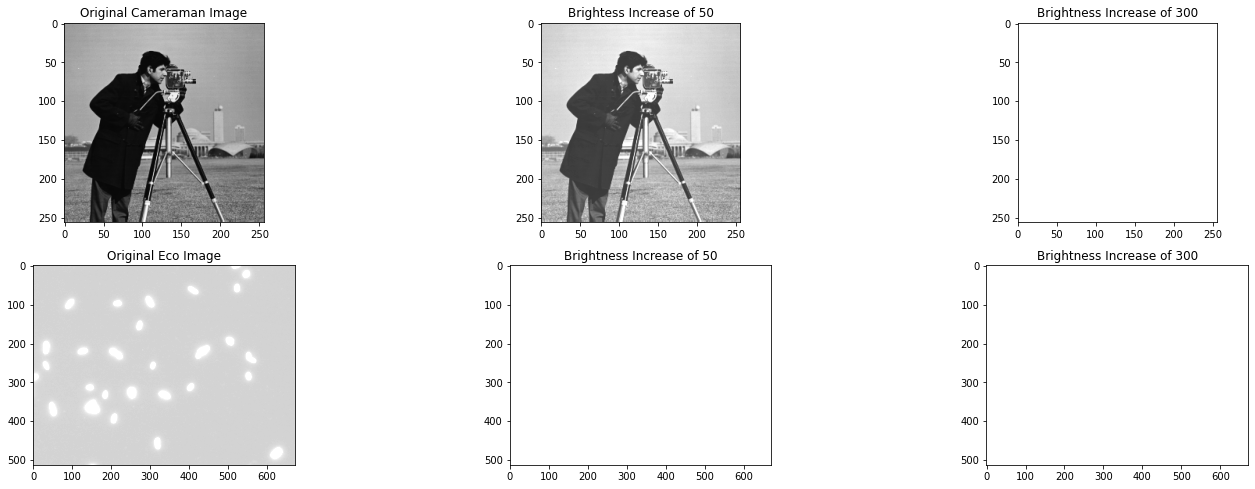

In [22]:
# Implement this function
def imadd(pic,brightness=50):
    # Add brightness to each pixel
    # print("shape: {}".format(pic.shape))
    # print("dtype: {}".format(pic.dtype))
    upperbound = 255
    # if pic.dtype == np.uint16:
    #     print("uint16 image")
    #     upperbound = 65535
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            if pic[i][j] + brightness < upperbound:
                pic[i][j] += brightness
            else:
                pic[i][j] = upperbound
    return pic

# Read the image
cameraman_origin = imageio.imread('cameraman.tif')
eco_origin = imageio.imread('eco.tif')
# Create a copy of the origina image for us to manipulate
cameraman_bright_50 = copy.deepcopy(cameraman_origin)
cameraman_bright_300 = copy.deepcopy(cameraman_origin)
eco_bright_50 = copy.deepcopy(eco_origin)
eco_bright_300 = copy.deepcopy(eco_origin)
print("Max val: {}".format(np.max(eco_origin)))

# Call imadd to perform enhancement
cameraman_bright_50 = imadd(cameraman_bright_50,50)
cameraman_bright_300 = imadd(cameraman_bright_300, 300)
eco_bright_50 = imadd(eco_bright_50, 50)
eco_bright_300 = imadd(eco_bright_300, 40000)

print("Num unique pixels in original cameraman image: {}".format(len(np.unique(cameraman_origin))))
print("Num unique pixels from increasing brightness by 50: {}".format(len(np.unique(cameraman_bright_50))))
print("Num unique pixels from increasing brightness by 300: {}".format(len(np.unique(cameraman_bright_300))))
print("Num unique pixels in original eco image: {}".format(len(np.unique(eco_origin))))
print("Num unique pixels from increasing brightness by 50: {}".format(len(np.unique(eco_bright_50))))
print("Num unique pixels from increasing brightness by 300: {}".format(len(np.unique(eco_bright_300))))

# Show the results
# fig_cam_origin = plt.figure(1)
# fig_cam_origin.suptitle('Original Image')
# plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
# fig_cam_bright = plt.figure(2)
# fig_cam_bright.suptitle('Brightened Image')
# plt.imshow(cameraman_bright,cmap='gray',vmin = 0, vmax = 255)
# plt.show()
fig = plt.figure(figsize=(20,10))
plt.subplot(331)
plt.title("Original Cameraman Image")
plt.imshow(cameraman_origin,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(332)
plt.title("Brightess Increase of 50")
plt.imshow(cameraman_bright_50,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(333)
plt.title("Brightness Increase of 300")
plt.imshow(cameraman_bright_300,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(334)
plt.title("Original Eco Image")
plt.imshow(eco_origin,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(335)
plt.title("Brightness Increase of 50")
plt.imshow(eco_bright_50,cmap='gray',vmin = 0, vmax = 255)
plt.subplot(336)
plt.title("Brightness Increase of 300")
plt.imshow(eco_bright_300,cmap='gray',vmin = 0, vmax = 255)
fig.tight_layout(pad=1.0)


#### What is the dynamic range (the number of distinct pixel values in an image) of the original and the enhanced image?
The dynamic range is a value from 0 to 255 for the cameraman.tif. In the original cameraman.tif image, there are 247 unique pixels, but when adding a brightness of 300, the picture becomes oversaturated and there is only 1 unique pixel. And when only adding a brightness of 50, there is 199 unique pixels. The eco image is type uint16_t, but if we limit it to the same range as an 8 bit image, it immediately gets saturated when adding a brightness of 50 or 300. It originally has 1748 unique pixel values, but adding a brightness decreases the number of unique pixels to 5, and 300 to 1. By allowing it to instead have of a range of a uint16_t number from 0 to 65,535, the original image comes out black. Increasing by a brightness of 50 or 300 visually has no effect, and increasing the brightness by 40,000 makes the image look completely gray. By using a greater range, the pixel values are relatively close to even make out their distinct intensities with the eye. 

#### What will happen if we increase brightness by 300?
If we increase the brightness by 300, the picture becomes oversaturated since the range of uint8_t is only 0 to 255. Thus the image comes out completely white. In the case of the eco.tif image, by increasing its range from 0 to 65,535 since it is a uint16_t image, increasing its brightness by 50 or 300 seemingly has no effect and appears to leave the image completely black. This is because a value of 50 or 300 is relatively small in a range from 0 to 65,535 compared to 0 to 255. If the range of the eco.tif image is instead limited to 0 to 255, then spots can be made out in the original image, but it becomes immediately saturated when increasing by a brightness of 300. 

#### Could you enhance the quality of the image eco.tif by simply increasing its brightness?
No you cannot since the image is already bright. Even increasing the brightness by 50 oversaturates the image. 

C:\Users\flaco\AppData\Local\Temp\ipykernel_3160\2586617497.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  eco_origin = imageio.imread('eco.tif')


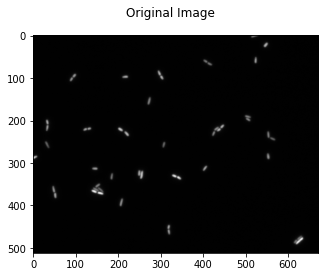

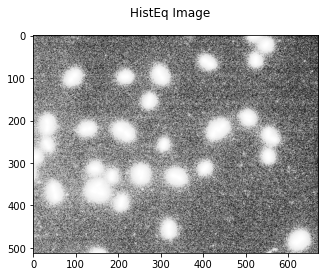

In [23]:
# Read the image
eco_origin = imageio.imread('eco.tif')

# Apply Histogram Equalization here!
eco_histeq = exposure.equalize_hist(eco_origin, mask=None)
# eco_histeq = exposure.equalize_hist(eco_histeq, mask=None)

# Show the results
fig_cam_origin = plt.figure(1)
fig_cam_origin.suptitle('Original Image')
plt.imshow(eco_origin,cmap='gray')
fig_cam_bright = plt.figure(2)
fig_cam_bright.suptitle('HistEq Image')
plt.imshow(eco_histeq,cmap='gray')
plt.show()

#### Can you improve the result of enhancement by repeating the histogram equalization? Why?
You cannot improve the results by repeating the equalization. This is because histogram equalization distrubutes high intensity areas. Once it has been performed, pixel intensities are no longer clustered, thus there is nothing for the second histogram equalization to distribute. From lecture, performing histogram equalization linearizes the cdf of an image. If the cdf of an image is already linear, performing histogram equalization has no effect. 

C:\Users\flaco\AppData\Local\Temp\ipykernel_3160\3051978525.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten_origin = imageio.imread('kitten.png')


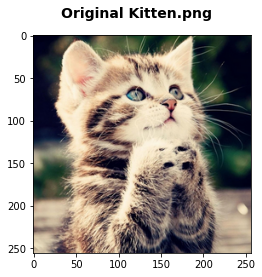

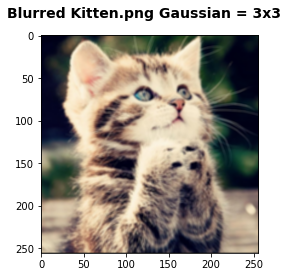

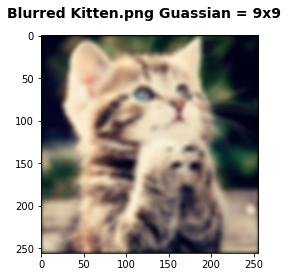

In [24]:
# Gaussian Kernel Following the Descriptiong: 
# http://www.mathworks.com/help/images/ref/fspecial.html
def gengaussian(size=5,sigma=3.0):
    if size%2==0 or size<2:
        print('Size Not Valid')
        return None
    kernel = np.zeros((size,size))
    for x in range(size):
        for y in range(size):
            kernel[x][y] = np.exp(-((x-(size-1)/2)**2 \
                           +(y-(size-1)/2)**2)/(2*sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

# Read Image and Display
kitten_origin = imageio.imread('kitten.png')
# Create a copy of the origina image for us to manipulate
kitten_blur = copy.deepcopy(kitten_origin)
kitten_blur_2 = copy.deepcopy(kitten_origin)
# Generate Kernel
kernel = gengaussian(3)
kernel_2 = gengaussian(9)
# Apply Convolution Here!
for i in range(3):
    kitten_blur[:, :, i] = signal.convolve2d(kitten_origin[:, :, i], kernel, mode='same', boundary='fill', fillvalue=0)
    kitten_blur_2[:, :, i] = signal.convolve2d(kitten_origin[:, :, i], kernel_2, mode='same', boundary='fill', fillvalue=0)



# Display Results
fig_kitten_origin = plt.figure(1)
fig_kitten_origin.suptitle('Original Kitten.png', fontsize=14, fontweight='bold')
plt.imshow(kitten_origin,vmin = 0, vmax = 255)
fig_kitten_blur = plt.figure(2)
fig_kitten_blur.suptitle('Blurred Kitten.png Gaussian = 3x3', fontsize=14, fontweight='bold')
plt.imshow(kitten_blur,vmin = 0, vmax = 255)
fig_kitten_blur_2 = plt.figure(3)
fig_kitten_blur_2.suptitle("Blurred Kitten.png Guassian = 9x9", fontsize=14, fontweight='bold')
plt.imshow(kitten_blur_2, vmin=0, vmax=255)
plt.show()

#### Change the sigma value of the gaussian kernel and describe its effects.

Increasing the value of sigma for the Guassian kernel increases the amount of blur. This is because a Guassian kernel conceptually is a weighted average of the surrounding pixels around a center pixel. A value n of sigma creates an nxn kernel which causes the filter to be applied to more neighboring pixels as n increases. This results in more blur since more pixels are being averaged. 